# Somnium
### Dinorah de Farias Chagas

Quem nunca sonhou com farofa e se perguntou oque aquilo poderia significar na sua vida? Por mais esoterico que possa parecer os significados dos sonhos estao presente em varias
culturas e religioes, ultrapassam o tempo e é como um sneak peak do futuro na maioria das vezes. Os sonhos sao objetos de estudo em diversas areas como neurociencia e a psicanalise, Freud via os sonhos como uma maneira de expressao dos desejos ocultos, Carl Jung considera os sonhos como importantes para o desenvolvimento da personalidade e o autoconhecimento.

Com esse viés, muitos sonhos lúcidos que tenho semanalmente e muita curiosidade, decidi fazer uma soluçao que me ajudasse a entender melhor o significado dos sonhos.
O Somnium se propoe a oferecer um entendimento melhor sobre os sonhos, oferecendo um significado contextualizado.

Se tratando de uma ciência longe de ser exata podemos cair no limbo de nunca ter certeza se nossos resultados estão certos ou errados,

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Base de Dados
para esse problema em especifico nao cheguei a procurar muito alguma base já pronta, esse era um projeto que queria desenvolver a algum tempo e fiz um web scrap de uma pagina que ja me tirou muitas duvidas sobre os meus sonhos, [livro do sonho](https://www.livrodosonho.com/).

De primeira tentei fazer o scrapping com selenium que demorou DEMAIS, pesquisei alternativas e a que deu certo de maneira até que rapida foi usando [scrapy](https://docs.scrapy.org/en/latest/) nunca tinha usado e achei bem ok, como nao é o foco desse trabalho nao vou falar sobre esse processo mais vou deixar a estrutura e script do scrapping no mesmo repositorio.

In [2]:
import pandas as pd
import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

corpus = pd.read_csv('/content/drive/MyDrive/sonhos_interpretacoes.csv', index_col=0)

corpus.head()

,significado,sonho
inicial,,
h,Sonhar com humilhação mostra uma situação fina...,sonhar com humilhação
f,"Ver um: viagem inesperada, geralmente em compa...",sonhar com fuzil
a,Significado dos sonhos com a letra Z Os signif...,sonhos letra z
d,"Sonhar com dica mostra exatamente isso, recebe...",sonhar com dica
d,Sonhar com dúvida simboliza uma certeza.,sonhar com dúvida


In [ ]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7138 entries, h to r
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   significado  7136 non-null   object
 1   sonho        7138 non-null   object
dtypes: object(2)
memory usage: 167.3+ KB


In [ ]:
# retirar entradas das páginas

texto_paginas= "Sonhos A Sonhos B Sonhos C Sonhos D Sonhos E Sonhos F Sonhos G Sonhos H Sonhos I Sonhos J Sonhos L Sonhos M Sonhos N Sonhos O Sonhos P Sonhos Q Sonhos R Sonhos S Sonhos T Sonhos U Sonhos V Sonhos X Sonhos Z"
corpus = corpus[~corpus['significado'].str.contains(texto_paginas, na=False)]

corpus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7115 entries, h to r
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   significado  7113 non-null   object
 1   sonho        7115 non-null   object
dtypes: object(2)
memory usage: 166.8+ KB


In [ ]:
corpus.dropna(inplace=True)

In [ ]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7113 entries, h to r
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   significado  7113 non-null   object
 1   sonho        7113 non-null   object
dtypes: object(2)
memory usage: 166.7+ KB


##  Pré Processamento


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

nlp = spacy.load('pt_core_news_sm')

def tokenizar(texto):
    texto = texto.lower()
    doc = nlp(texto)
    stop_words = set(stopwords.words('portuguese'))
    stop_words.update(['pode', 'ser', 'sonho', 'sonhar', 'geralmente', 'ver', 'sinal', 'sonhos','simbolizar', 'significa', 'significado',
                       'significados', 'interpretação', 'interpretações','siginificar','simbolizo','indicar','demonstrar','representar',
                       'mostrar','de o', 'a o', 'em o', 'para o', 'por o', 'com o', 'sem o',
                       ])

    tokens_lemma = []
    for token in doc:
        lemma = token.lemma_.strip().lower()
        if lemma and not token.is_punct and lemma not in stop_words and len(lemma) > 2 :
            tokens_lemma.append(lemma)

    return tokens_lemma


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dinorah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/dinorah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
corpus['tokens'] = corpus['significado'].apply(tokenizar)

corpus['tokens'].head()

inicial
h           [humilhação, situação, financeiro]
f        [viagem, inesperar, companhia, filho]
d    [dica, exatamente, receber, grande, dica]
d                            [dúvida, certeza]
i                              [itália, união]
Name: tokens, dtype: object

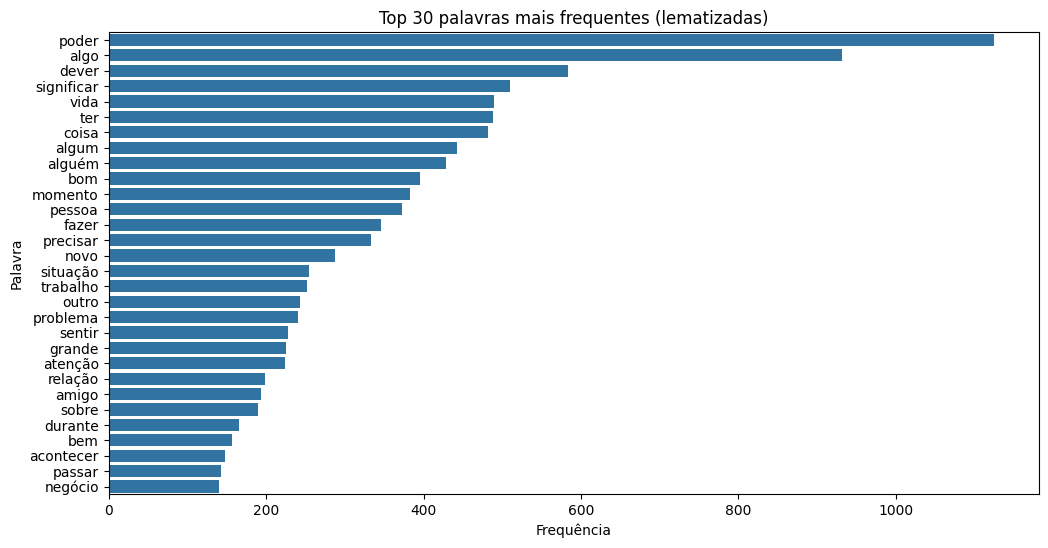

In [ ]:
from collections import Counter

# Contar as palavras

todos_tokens = [token for lista in corpus['tokens'] for token in lista]
frequencia = Counter(todos_tokens).most_common(30)

# Visualizar com gráfico
import seaborn as sns

palavras, contagens = zip(*frequencia)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(contagens), y=list(palavras))
plt.title("Top 30 palavras mais frequentes (lematizadas)")
plt.xlabel("Frequência")
plt.ylabel("Palavra")
plt.show()


In [ ]:
print(frequencia)

[('poder', 1125), ('algo', 931), ('dever', 584), ('significar', 510), ('vida', 489), ('ter', 488), ('coisa', 482), ('algum', 443), ('alguém', 429), ('bom', 395), ('momento', 383), ('pessoa', 372), ('fazer', 346), ('precisar', 333), ('novo', 288), ('situação', 254), ('trabalho', 252), ('outro', 243), ('problema', 241), ('sentir', 228), ('grande', 225), ('atenção', 224), ('relação', 198), ('amigo', 193), ('sobre', 190), ('durante', 166), ('bem', 157), ('acontecer', 148), ('passar', 143), ('negócio', 140)]


In [ ]:
frequencia = Counter(todos_tokens).most_common(500)
print(frequencia)

[('poder', 1125), ('algo', 931), ('dever', 584), ('significar', 510), ('vida', 489), ('ter', 488), ('coisa', 482), ('algum', 443), ('alguém', 429), ('bom', 395), ('momento', 383), ('pessoa', 372), ('fazer', 346), ('precisar', 333), ('novo', 288), ('situação', 254), ('trabalho', 252), ('outro', 243), ('problema', 241), ('sentir', 228), ('grande', 225), ('atenção', 224), ('relação', 198), ('amigo', 193), ('sobre', 190), ('durante', 166), ('bem', 157), ('acontecer', 148), ('passar', 143), ('negócio', 140), ('simboliza', 137), ('amor', 136), ('mudança', 133), ('próximo', 133), ('período', 131), ('preciso', 125), ('querer', 124), ('importante', 123), ('usar', 123), ('tempo', 116), ('preocupação', 114), ('caminho', 114), ('dia', 109), ('dar', 104), ('financeiro', 103), ('sentimento', 103), ('sucesso', 97), ('relacionamento', 97), ('agora', 96), ('profissional', 96), ('ficar', 95), ('pessoal', 93), ('tudo', 90), ('desejo', 89), ('sorte', 89), ('certo', 86), ('pouco', 86), ('assunto', 85), ('c

In [ ]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7113 entries, h to r
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   significado  7113 non-null   object
 1   sonho        7113 non-null   object
 2   tokens       7113 non-null   object
dtypes: object(3)
memory usage: 222.3+ KB


In [ ]:
corpus.head()

,significado,sonho,tokens
inicial,,,
h,Sonhar com humilhação mostra uma situação fina...,sonhar com humilhação,"[humilhação, situação, financeiro]"
f,"Ver um: viagem inesperada, geralmente em compa...",sonhar com fuzil,"[viagem, inesperar, companhia, filho]"
d,"Sonhar com dica mostra exatamente isso, recebe...",sonhar com dica,"[dica, exatamente, receber, grande, dica]"
d,Sonhar com dúvida simboliza uma certeza.,sonhar com dúvida,"[dúvida, certeza]"
i,Sonhar com Itália simboliza uma união.,sonhar com itália,"[itália, união]"


In [ ]:
corpus['texto_lemas'] = corpus['tokens'].apply(lambda lista: ' '.join(lista))
corpus['texto_lemas'].head()

inicial
h         humilhação situação financeiro
f       viagem inesperar companhia filho
d    dica exatamente receber grande dica
d                         dúvida certeza
i                           itália união
Name: texto_lemas, dtype: object

### Extração de Características


In [ ]:
keywords_por_categoria = {
    'Presságios e Avisos': [
        'problema', 'preocupacao', 'dificuldade', 'medo', 'falta', 'enfrentar', 'perder', 'ansiedade', 'obstaculo',
        'dificil', 'perda', 'alerta', 'falso', 'intriga', 'evitar', 'inseguranca', 'desafio', 'risco', 'traicao', 'mau',
        'receio', 'inveja', 'contra', 'mal', 'aborrecimento', 'negativo', 'inimigo', 'serio', 'contrario', 'desentendimento',
        'duvida', 'decepcao', 'culpa', 'carencia', 'discussao', 'rompimento', 'insatisfacao', 'morte', 'agouro', 'pressao',
        'exagerar', 'segredo', 'briga', 'doenca', 'tensao', 'incomodar', 'prejudicar', 'prejuizo', 'sofrer', 'tristeza',
        'frustracao', 'fofoca', 'esconder', 'pesar', 'cautela', 'bom', 'novo', 'sucesso', 'bem', 'sorte', 'receber',
        'felicidade', 'alegria', 'protecao', 'prosperidade', 'feliz', 'positivo', 'solucao', 'oportunidade', 'superar',
        'seguranca', 'apoio', 'alcançar', 'atingir', 'resultado', 'esperanca', 'conquista', 'paz', 'agradavel', 'ganho',
        'melhora', 'reconhecimento', 'harmonia', 'surpresa', 'ajuda', 'realizacao', 'satisfacao', 'fartura', 'diversao',
        'aumento', 'ascensao', 'excelente', 'exito', 'destaque', 'aproveitar', 'riqueza', 'renovacao', 'progresso',
        'favoravel', 'novidade', 'confortavel', 'chance', 'vitoria', 'inesperado', 'prazer', 'saudavel', 'pressagio'
    ],
    'Vida Pessoal e Relacionamentos': [
        'pessoa', 'relacao', 'amigo', 'amor', 'familia', 'casamento', 'amoroso', 'parente', 'amizade', 'social',
        'festa', 'mulher', 'homem', 'familiar', 'grupo', 'afetivo', 'sentimental', 'carinho', 'solteiro', 'ligacao',
        'corpo', 'bebe', 'filho', 'crianca', 'parceiro', 'encontro', 'contato', 'atrair', 'uniao', 'lar'
    ],
    'Trabalho e Finanças': [
        'trabalho', 'negocio', 'financeiro', 'dinheiro', 'profissional', 'emprego', 'jogo', 'meta', 'esforco', 'dedicacao',
        'responsabilidade', 'projeto', 'plano', 'papel', 'tarefa', 'material', 'lucro', 'documento', 'pagar', 'comprar',
        'conta', 'trabalhar', 'aumento', 'promocao', 'carreira'
    ],
    'Jornada Interior e Autoconhecimento': [
        'vida', 'sentir', 'atencao', 'caminho', 'sentimento', 'desejo', 'certo', 'necessidade', 'decisao', 'energia', 'forca',
        'atitude', 'mudar', 'olhar', 'vontade', 'confianca', 'espiritual', 'controle', 'aspecto', 'ideia', 'habilidade',
        'opiniao', 'fisico', 'escolha', 'compromisso', 'acao', 'busca', 'pensamento', 'capacidade', 'consciencia',
        'experiencia', 'inconsciente', 'lembranca', 'equilibrio', 'mente', 'intuicao', 'verdade', 'mental', 'personalidade',
        'compreensao', 'valorizar', 'razao', 'opcao', 'aprender', 'valor', 'foco', 'criatividade', 'organizacao', 'limpeza',
        'planejar', 'momento', 'acontecer', 'passar', 'mudanca', 'proximo', 'periodo', 'tempo', 'dia', 'agora', 'fase',
        'futuro', 'passado', 'inesperar', 'acontecimento', 'começar', 'acabar', 'ritmo', 'transformacao', 'visao',
        'adaptacao', 'parar', 'vir', 'chegar', 'sair', 'volta', 'viajem', 'desenvolvimento'
    ]
}

In [ ]:
import time
from transformers import pipeline

def expandir_variacoes(palavras):
    variacoes = set()
    for palavra in palavras:
        variacoes.add(palavra)

        # Plural regular
        if palavra.endswith(('a', 'e', 'o')):
            variacoes.add(palavra + 's')

        # Flexões comuns
        if 'ção' in palavra:
            variacoes.add(palavra.replace('ção', 'ções'))
        if 'são' in palavra:
            variacoes.add(palavra.replace('são', 'sões'))
        if 'dade' in palavra:
            variacoes.add(palavra.replace('dade', 'dades'))
        if 'vel' in palavra:
            variacoes.add(palavra.replace('vel', 'veis'))
        if 'mento' in palavra:
            variacoes.add(palavra.replace('mento', 'mentos'))
        if palavra.endswith('r'):
            variacoes.add(palavra + 'ão')  # ex: "ganhar" → "ganhão" (para casos improváveis)

    return list(variacoes)


keywords_por_categoria_expandida = {
    categoria: expandir_variacoes(palavras)
    for categoria, palavras in keywords_por_categoria.items()
}


def classify_by_category(text):
    if not isinstance(text, str):
        return 'Não Classificado'
    text_lower = text.lower()
    scores = {categoria: sum(1 for keyword in keywords if keyword in text_lower) for categoria, keywords in keywords_por_categoria_expandida.items()}
    categoria_final = max(scores, key=scores.get)
    return 'Informativo/Geral' if scores[categoria_final] == 0 else categoria_final

corpus['categoria_heuristica'] = corpus['significado'].apply(classify_by_category)

# --- PASSO 4: RESULTADO FINAL ---
print("\n--- Amostra do Resultado Final ---")
print(corpus[['significado', 'categoria_heuristica']].head(10))



--- Amostra do Resultado Final ---
                                               significado  \
inicial                                                      
h        Sonhar com humilhação mostra uma situação fina...   
f        Ver um: viagem inesperada, geralmente em compa...   
d        Sonhar com dica mostra exatamente isso, recebe...   
d                 Sonhar com dúvida simboliza uma certeza.   
i                   Sonhar com Itália simboliza uma união.   
i        Sonhar com isqueiro simboliza que deve começar...   
c              Sonhar com cyborg pode mostrar duas coisas.   
i        Sonhar com isolar simboliza algo para se refle...   
o        Proteção extra em viagens e até mesmo no trâns...   
m        Sonhar com mutuca simboliza que algo doloroso ...   

                        categoria_heuristica  
inicial                                       
h                          Informativo/Geral  
f             Vida Pessoal e Relacionamentos  
d                        Pressá

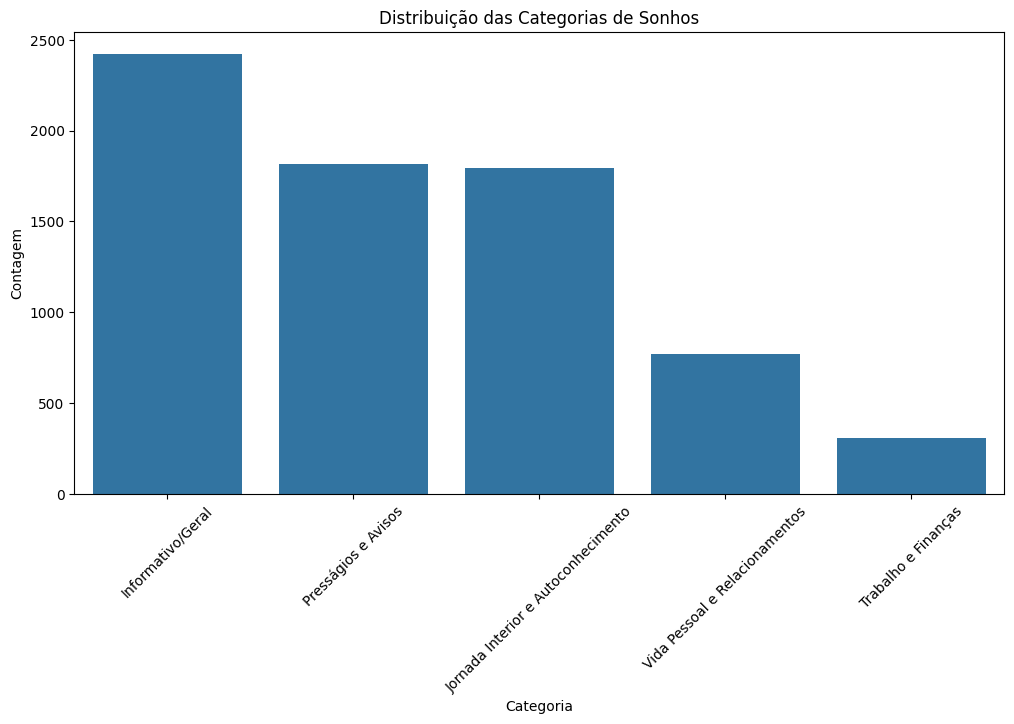

In [ ]:
# distribuicao das categorias

plt.figure(figsize=(12, 6))
sns.countplot(data=corpus, x='categoria_heuristica', order=corpus['categoria_heuristica'].value_counts().index)
plt.title("Distribuição das Categorias de Sonhos")
plt.xlabel("Categoria")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# salvando em csv
corpus.to_csv('sonhos_categorizados.csv', index=False)

In [20]:
corpus = pd.read_csv('/content/drive/MyDrive/Somnium/sonhos_categorizados.csv')

In [21]:
corpus.head()

,significado,sonho,tokens,texto_lemas,categoria_heuristica
0,Sonhar com humilhação mostra uma situação fina...,sonhar com humilhação,"['humilhação', 'situação', 'financeiro']",humilhação situação financeiro,Informativo/Geral
1,"Ver um: viagem inesperada, geralmente em compa...",sonhar com fuzil,"['viagem', 'inesperar', 'companhia', 'filho']",viagem inesperar companhia filho,Vida Pessoal e Relacionamentos
2,"Sonhar com dica mostra exatamente isso, recebe...",sonhar com dica,"['dica', 'exatamente', 'receber', 'grande', 'd...",dica exatamente receber grande dica,Presságios e Avisos
3,Sonhar com dúvida simboliza uma certeza.,sonhar com dúvida,"['dúvida', 'certeza']",dúvida certeza,Jornada Interior e Autoconhecimento
4,Sonhar com Itália simboliza uma união.,sonhar com itália,"['itália', 'união']",itália união,Informativo/Geral


### Treinamento Supervisionado


In [6]:
# Supondo que as colunas existam
X_textos = corpus['texto_lemas']
y_labels = corpus['categoria_heuristica']  # ou o nome da sua coluna com os rótulos definidos manualmente

# Remover linhas com rótulos ausentes
mascara_validos = y_labels.notnull()
X_textos = X_textos[mascara_validos]
y_labels = y_labels[mascara_validos]


geração de embeddings

In [7]:
from sentence_transformers import SentenceTransformer

# Modelo multilíngue eficiente
modelo_embed = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
X_embeddings = modelo_embed.encode(X_textos.tolist(), show_progress_bar=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/223 [00:00<?, ?it/s]

KeyboardInterrupt: 

Batches: 100%|██████████| 223/223 [00:05<00:00, 41.03it/s]
/home/dinorah/ufrn/NLP/testes/.testes/lib64/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/dinorah/ufrn/NLP/testes/.testes/lib64/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


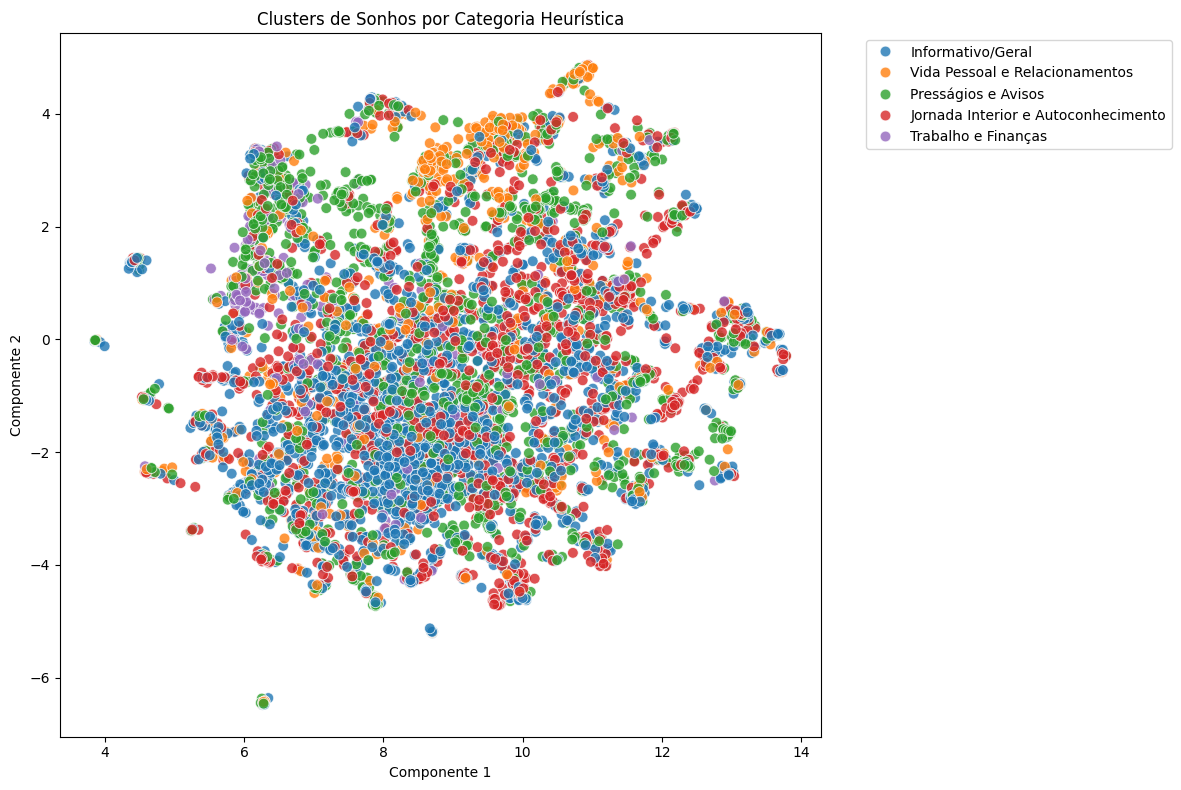

In [ ]:
# Visualização de Clusters Semânticos com UMAP


# Substitua pelo caminho real do seu arquivo CSV com as colunas 'texto_lemas' e 'categoria_heuristica'
corpus = pd.read_csv('sonhos_categorizados.csv')
corpus = corpus.dropna(subset=['texto_lemas', 'categoria_heuristica'])

# Passo 2: Gerar Embeddings com SentenceTransformer
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
embeddings = model.encode(corpus['texto_lemas'].tolist(), show_progress_bar=True)

# Passo 3: Redução de Dimensionalidade com UMAP
import umap

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
embeddings_2d = reducer.fit_transform(embeddings)

# Passo 4: Visualização com Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=embeddings_2d[:, 0],
    y=embeddings_2d[:, 1],
    hue=corpus['categoria_heuristica'],
    palette='tab10',
    s=60,
    alpha=0.8
)
plt.title("Clusters de Sonhos por Categoria Heurística")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


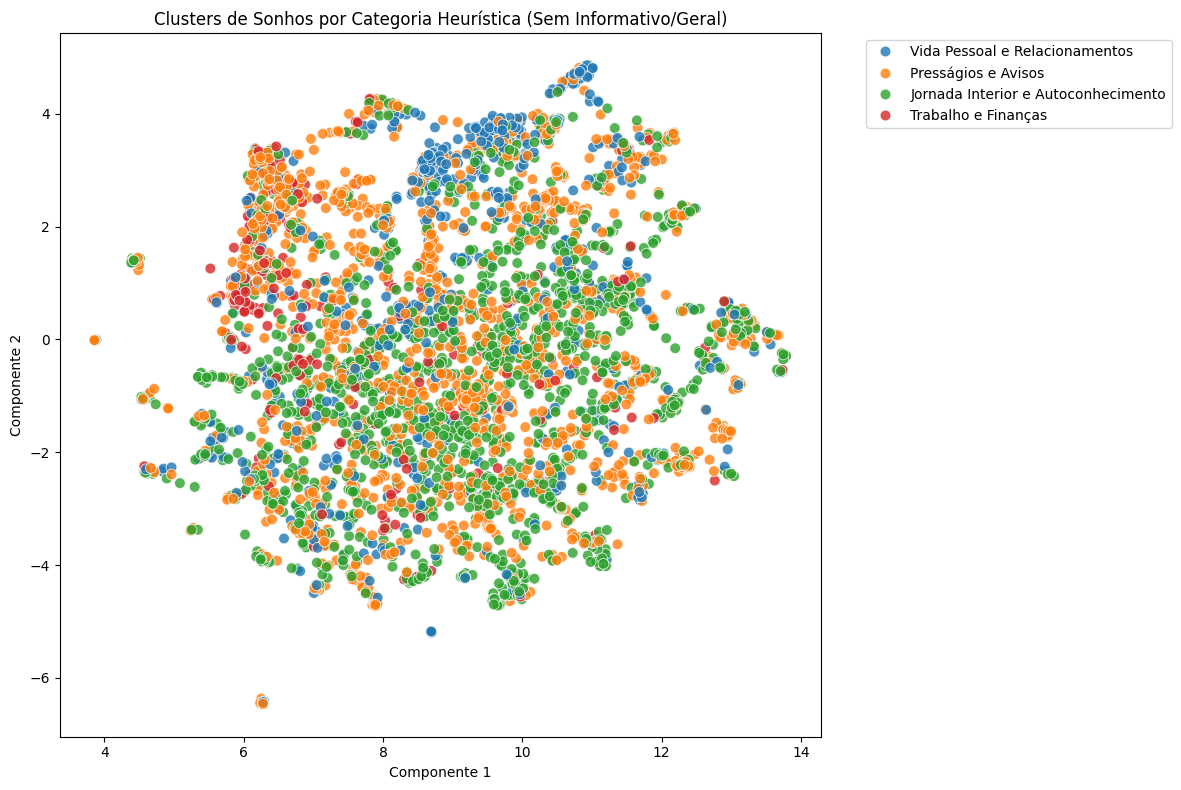

In [ ]:
# ver clusters sem a categoria informativo geral
corpus_filtrado = corpus[corpus['categoria_heuristica'] != 'Informativo/Geral']
# Passo 4: Visualização com Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=embeddings_2d[corpus['categoria_heuristica'] != 'Informativo/Geral', 0],
    y=embeddings_2d[corpus['categoria_heuristica'] != 'Informativo/Geral', 1],
    hue=corpus_filtrado['categoria_heuristica'],
    palette='tab10',
    s=60,
    alpha=0.8
)
plt.title("Clusters de Sonhos por Categoria Heurística (Sem Informativo/Geral)")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Batches: 100%|██████████| 223/223 [00:05<00:00, 41.43it/s]


                                     precision    recall  f1-score   support

                  Informativo/Geral       0.70      0.72      0.71       485
Jornada Interior e Autoconhecimento       0.61      0.57      0.59       359
                Presságios e Avisos       0.59      0.63      0.61       363
                Trabalho e Finanças       0.42      0.40      0.41        62
     Vida Pessoal e Relacionamentos       0.59      0.57      0.58       154

                           accuracy                           0.63      1423
                          macro avg       0.58      0.58      0.58      1423
                       weighted avg       0.63      0.63      0.63      1423



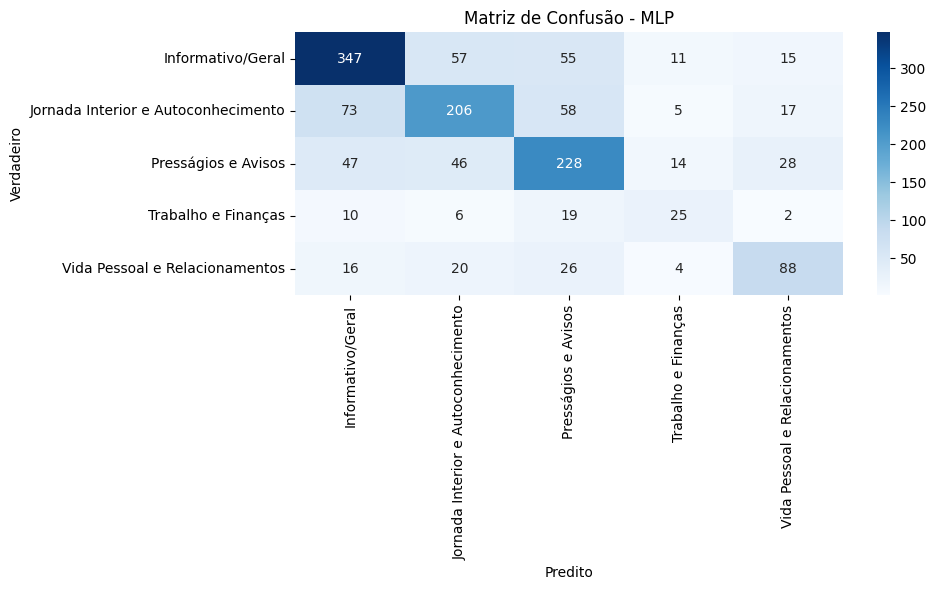

In [ ]:
# Passo 1: Preparar os dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Eliminar entradas inválidas
corpus_valid = corpus.dropna(subset=['texto_lemas', 'categoria_heuristica'])

X_textos = corpus_valid['texto_lemas'].tolist()
y_categorias = corpus_valid['categoria_heuristica'].tolist()

# Codificar rótulos em números
le = LabelEncoder()
y_encoded = le.fit_transform(y_categorias)

# Embeddings
from sentence_transformers import SentenceTransformer
modelo_embed = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
X_embeddings = modelo_embed.encode(X_textos, show_progress_bar=True)

# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_embeddings, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Passo 2: Treinar rede neural MLP
mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# Passo 3: Avaliação
y_pred = mlp.predict(X_test)

# Relatório de métricas
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Matriz de confusão
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Matriz de Confusão - MLP")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()


In [ ]:
def interpretar_sonho(texto_usuario, modelo_embed, classificador, label_encoder, index_faiss, textos_base, llm_modelo, k=5):
    # 1. Classificação da categoria (apoio)
    categoria = classificar_sonho(texto_usuario, modelo_embed, classificador, label_encoder)

    # 2. Busca de sonhos similares
    similares = buscar_contexto_faiss(texto_usuario, modelo_embed, index_faiss, textos_base, k=k)

    # 3. Geração de resposta com LLM
    prompt = f"""Você é um especialista em interpretação de sonhos.
        Abaixo estão sonhos semelhantes ao relatado por um usuário. Use esses exemplos como base para interpretar o sonho descrito.

        Categoria de apoio: {categoria}

        Sonho do usuário:
        "{texto_usuario}"

        Sonhos similares:
        {chr(10).join([f"- {s}" for s in similares])}

        Com base nesses sonhos, gere uma interpretação provável para o sonho do usuário:
        """

    resposta = llm_modelo(prompt)
    return resposta, categoria, similares


embeddings


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Carregar e preparar corpus
corpus = pd.read_csv('sonhos_categorizados.csv')  # Substitua pelo caminho real
corpus = corpus.dropna(subset=['texto_lemas', 'categoria_heuristica'])

X_textos = corpus['texto_lemas'].tolist()
y_rótulos = corpus['categoria_heuristica'].tolist()

# Codificar rótulos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_rótulos)

# Gerar embeddings
modelo = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
X_embeddings = modelo.encode(X_textos, show_progress_bar=True)

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_embeddings, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)


Batches: 100%|██████████| 223/223 [00:06<00:00, 35.62it/s]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def avaliar_modelo(nome, modelo, X_test, y_test, y_pred, labels):
    print(f"\n=== {nome.upper()} ===")
    print(classification_report(y_test, y_pred, target_names=labels))

    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
                xticklabels=labels, yticklabels=labels, cmap='Blues')
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.tight_layout()
    plt.show()



=== MLP ===
                                     precision    recall  f1-score   support

                  Informativo/Geral       0.70      0.72      0.71       485
Jornada Interior e Autoconhecimento       0.61      0.57      0.59       359
                Presságios e Avisos       0.59      0.63      0.61       363
                Trabalho e Finanças       0.42      0.40      0.41        62
     Vida Pessoal e Relacionamentos       0.59      0.57      0.58       154

                           accuracy                           0.63      1423
                          macro avg       0.58      0.58      0.58      1423
                       weighted avg       0.63      0.63      0.63      1423



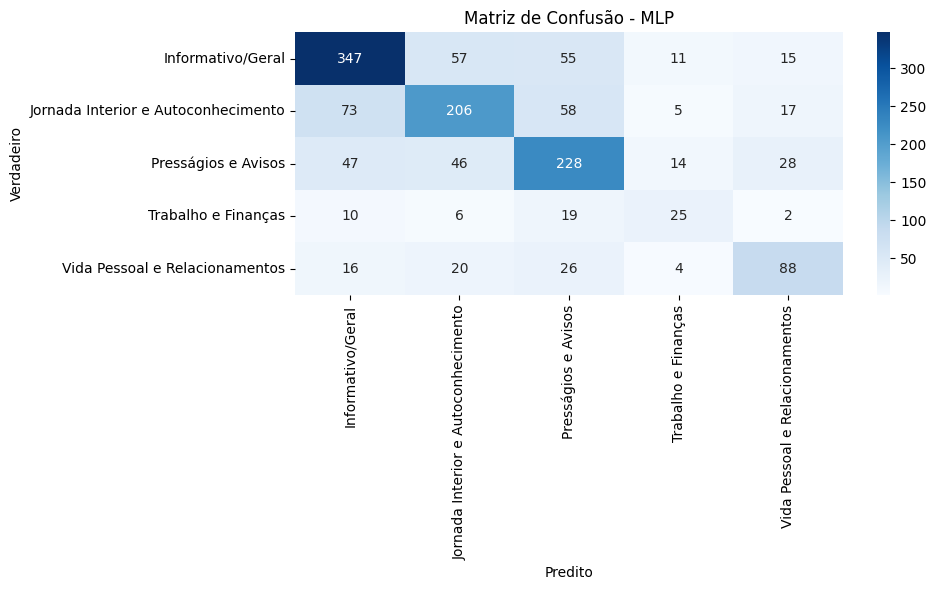

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

avaliar_modelo("MLP", mlp, X_test, y_test, y_pred_mlp, label_encoder.classes_)



=== SVM ===
                                     precision    recall  f1-score   support

                  Informativo/Geral       0.66      0.78      0.72       485
Jornada Interior e Autoconhecimento       0.62      0.56      0.59       359
                Presságios e Avisos       0.60      0.56      0.58       363
                Trabalho e Finanças       0.52      0.37      0.43        62
     Vida Pessoal e Relacionamentos       0.62      0.58      0.60       154

                           accuracy                           0.63      1423
                          macro avg       0.61      0.57      0.58      1423
                       weighted avg       0.63      0.63      0.62      1423



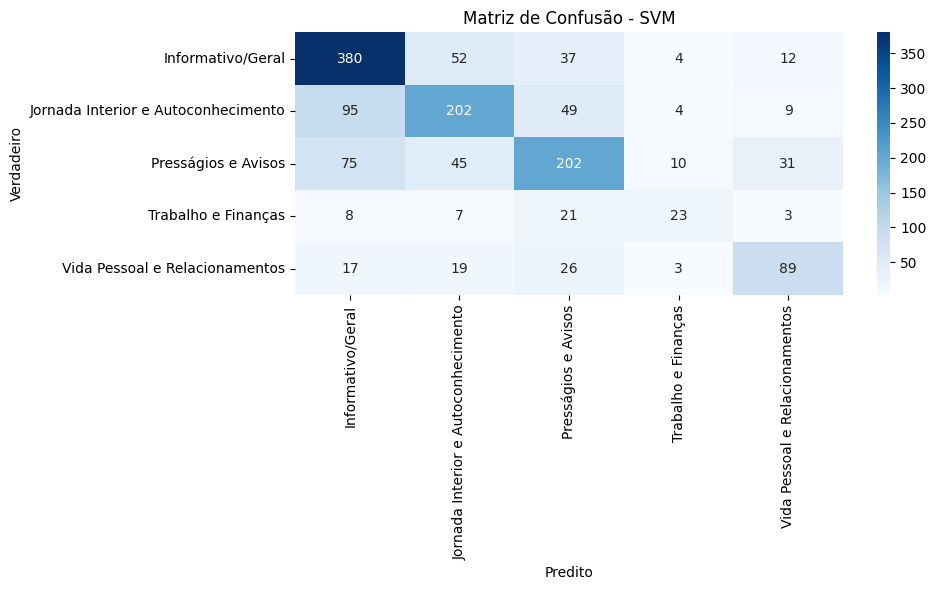

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

avaliar_modelo("SVM", svm, X_test, y_test, y_pred_svm, label_encoder.classes_)



=== LOGISTIC REGRESSION ===
                                     precision    recall  f1-score   support

                  Informativo/Geral       0.66      0.77      0.71       485
Jornada Interior e Autoconhecimento       0.61      0.54      0.57       359
                Presságios e Avisos       0.58      0.58      0.58       363
                Trabalho e Finanças       0.51      0.35      0.42        62
     Vida Pessoal e Relacionamentos       0.63      0.57      0.60       154

                           accuracy                           0.62      1423
                          macro avg       0.60      0.56      0.58      1423
                       weighted avg       0.62      0.62      0.62      1423



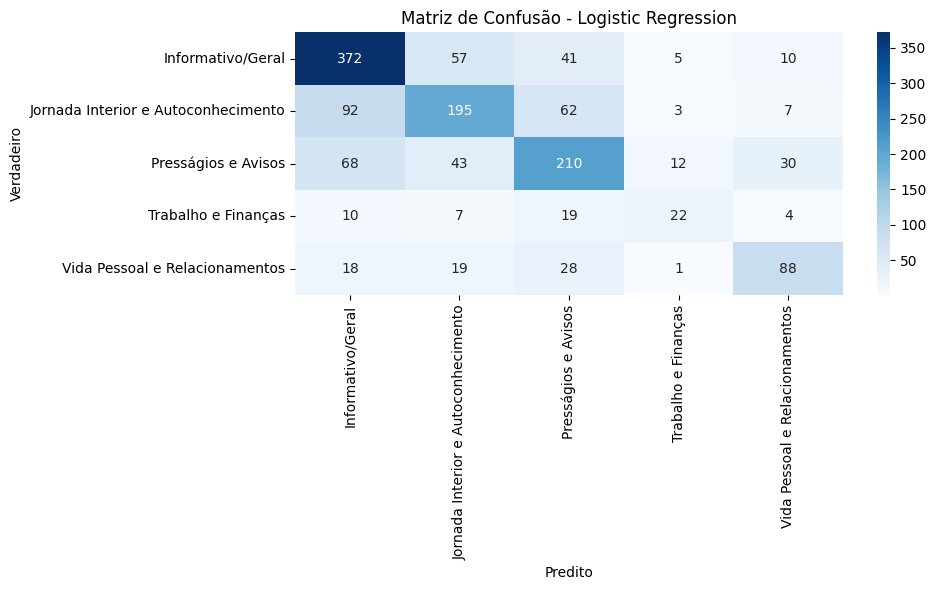

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=300, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

avaliar_modelo("Logistic Regression", logreg, X_test, y_test, y_pred_logreg, label_encoder.classes_)


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Filtra apenas dados com categoria válida e sem valores ausentes
df = corpus[corpus['categoria_heuristica'] != 'Informativo / Geral'].copy()
df = df.dropna(subset=['texto_lemas', 'categoria_heuristica'])

# Separação treino/validação
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['texto_lemas'], df['categoria_heuristica'],
    test_size=0.2, stratify=df['categoria_heuristica'], random_state=42
)

# Codificação de rótulos
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
num_labels = len(label_encoder.classes_)  # Útil para definir a saída do modelo

In [23]:

# TOKENIZAÇÃO
from transformers import AutoTokenizer
from datasets import Dataset

tokenizer = AutoTokenizer.from_pretrained("intfloat/multilingual-e5-base")

# Cria os datasets HuggingFace
train_ds = Dataset.from_dict({'text': train_texts.tolist(), 'labels': train_labels_enc.tolist()})
val_ds = Dataset.from_dict({'text': val_texts.tolist(), 'labels': val_labels_enc.tolist()})

# Função de tokenização
def tokenize(batch):
    return tokenizer(batch['text'], padding='max_length', truncation=True, max_length=128)

# Aplica tokenização
train_ds = train_ds.map(tokenize, batched=True)
val_ds = val_ds.map(tokenize, batched=True)

# Ajusta o formato esperado pelo Trainer
train_ds.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
val_ds.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

Map:   0%|          | 0/5690 [00:00<?, ? examples/s]

Map:   0%|          | 0/1423 [00:00<?, ? examples/s]

In [3]:
!pip install transformers datasets evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.4 MB/s eta 0:00:00


In [24]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import evaluate

model = AutoModelForSequenceClassification.from_pretrained(
    "intfloat/multilingual-e5-base", num_labels=num_labels
)

accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=1)
    return {
        'accuracy': accuracy.compute(predictions=preds, references=labels)['accuracy'],
        'f1_macro': f1.compute(predictions=preds, references=labels, average='macro')['f1']
    }

training_args = TrainingArguments(
    output_dir="./e5-classifier",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    learning_rate=5e-5,
    weight_decay=0.01,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    compute_metrics=compute_metrics
)

trainer.train()


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at intfloat/multilingual-e5-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: Unable to avoid copy while creating an array as requested.
If using `np.array(obj, copy=False)` replace it with `np.asarray(obj)` to allow a copy when needed (no behavior change in NumPy 1.x).
For more details, see https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword.

In [ ]:
trainer.evaluate()

# Predição em novos dados
def predizer_categoria(texto):
    inputs = tokenizer(texto, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs)
    pred = outputs.logits.argmax(dim=1).item()
    return label_encoder.inverse_transform([pred])[0]


# Preparação dos Dados para o Modelo

Este código transforma nosso arquivo CSV de sonhos em um formato que o modelo Transformer pode entender. O processo segue três etapas principais:

### 1. Carga e Limpeza dos Dados
* Carregamos o arquivo `sonhos_categorizados.csv`.
* Filtramos o dataset para usar apenas as categorias bem definidas, removendo os sonhos classificados como "Informativo/Geral".
* Limpamos os dados, descartando qualquer linha que não tivesse um texto ou uma categoria válida, para evitar erros no treinamento.

### 2. Divisão e Codificação dos Rótulos
* Separamos os dados em dois conjuntos: 80% para **treino** e 20% para **validação**.
* Essa divisão é feita de forma **estratificada**, garantindo que a proporção de cada categoria seja a mesma nos dois conjuntos, o que torna a nossa avaliação mais justa e confiável.
* Convertemos os rótulos de texto (ex: "Vida Pessoal") para números (ex: 0, 1, 2), que é o formato que o modelo de machine learning compreende.

### 3. Tokenização e Formatação Final
* Usamos o `Tokenizer` específico do modelo `e5-base` para converter as frases de texto em sequências de números (`input_ids`).
* Padronizamos todas as sequências para um tamanho fixo de 128 "tokens", cortando as muito longas e preenchendo as mais curtas.
* Por fim, convertemos tudo para o formato `Dataset` da biblioteca Hugging Face e, em seguida, para **tensores PyTorch**, que é o formato exato que o `Trainer` usa para alimentar o modelo.

---
Ao final deste processo, as variáveis `train_ds` e `val_ds` contêm nossos dados prontos para o treinamento.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset
from transformers import AutoTokenizer

# filtrar e preparar os dados
corpus = pd.read_csv('/content/drive/MyDrive/Somnium/sonhos_categorizados.csv')
df = corpus[corpus['categoria_heuristica'] != 'Informativo/Geral'].copy()
df = df.dropna(subset=['texto_lemas', 'categoria_heuristica'])

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['texto_lemas'], df['categoria_heuristica'], test_size=0.2, stratify=df['categoria_heuristica'], random_state=42
)

label_encoder = LabelEncoder() # codificação de rotulos 

train_labels_enc = label_encoder.fit_transform(train_labels)
val_labels_enc = label_encoder.transform(val_labels)
num_labels = len(label_encoder.classes_)

# tokenizar
tokenizer = AutoTokenizer.from_pretrained("intfloat/multilingual-e5-base")

def tokenize(batch):
    return tokenizer(batch['text'], padding='max_length', truncation=True, max_length=128)

train_ds = Dataset.from_dict({'text': list(train_texts), 'label': list(train_labels_enc)})
val_ds = Dataset.from_dict({'text': list(val_texts), 'label': list(val_labels_enc)})

train_ds = train_ds.map(tokenize, batched=True)
val_ds = val_ds.map(tokenize, batched=True)

train_ds.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
val_ds.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])


Map:   0%|          | 0/3752 [00:00<?, ? examples/s]

Map:   0%|          | 0/939 [00:00<?, ? examples/s]

In [2]:
!pip install "numpy==1.26.4"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 20.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


### Fine-tuning do Modelo Transformer para Classificação

Nesta seção, é realizada a etapa central deste projeto de NLP: o **fine-tuning** de um modelo de linguagem pré-treinado. O objetivo é especializar um modelo de propósito geral para a tarefa específica de classificar os significados dos sonhos em categorias pré-definidas.

usei a biblioteca `transformers` da Hugging Face.

1.  **Carregamento do Modelo (`AutoModelForSequenceClassification`)**
    * **Modelo Base:** A escolha foi o `intfloat/multilingual-e5-base`, baseado no XLM-RoBERTa.
    * **Adaptação para Classificação:** Ao carregá-lo com `AutoModelForSequenceClassification`, uma "cabeça" de classificação é adicionada no topo da arquitetura base. Essa nova camada é uma rede neural simples que será treinada do zero para mapear as representações do modelo para as `num_labels` (o número de categorias definidas).

2.  **Métricas de Avaliação (`compute_metrics`)**
    * Para avaliar a performance do modelo de forma robusta, foi definida uma função que calcula duas métricas importantes a cada época de validação:
        * **Acurácia (`accuracy_score`):** Mede a porcentagem de previsões corretas. É uma métrica simples e direta.
        * **F1-Score (Macro) (`f1_score`):** É a média harmônica da precisão e do recall, fornece uma visão mais justa do desempenho caso haja um desbalanceamento no número de exemplos por categoria.

3.  **Hiperparâmetros de Treinamento (`TrainingArguments`)**
    * Esta classe encapsula todos os hiperparâmetros que governam o processo de treinamento. Os principais definidos são:
        * `per_device_train_batch_size` / `per_device_eval_batch_size`: 8 e 16 pois estava demorando.
        * `num_train_epochs`: fiz com apenas 3 epocas.
        * `learning_rate`: A "velocidade" com que o modelo ajusta seus pesos durante o treino.
        * `weight_decay`: Uma técnica de regularização para prevenir overfitting.

4.  **O Orquestrador (`Trainer`)**
    * A classe `Trainer` é a API de alto nível da Hugging Face que une todos os componentes: o modelo, os argumentos de treino, os datasets de treino e validação, e a função de métricas. Ela abstrai toda a complexidade do loop de treinamento, permitindo iniciar o processo com um simples comando: `trainer.train()`.

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, f1_score
import numpy as np


model = AutoModelForSequenceClassification.from_pretrained(
    "intfloat/multilingual-e5-base",
    num_labels=num_labels
)


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1_macro": f1_score(labels, preds, average='macro')
    }


training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Somnium",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    learning_rate=5e-5,
    weight_decay=0.01,
    report_to="none"
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    compute_metrics=compute_metrics
)

# Iniciar treinamento
trainer.train()


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at intfloat/multilingual-e5-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
500,0.717600
1000,0.379900


TrainOutput(global_step=1407, training_loss=0.4517854746131924, metrics={'train_runtime': 467.0522, 'train_samples_per_second': 24.1, 'train_steps_per_second': 3.013, 'total_flos': 740407805190144.0, 'train_loss': 0.4517854746131924, 'epoch': 3.0})

In [23]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=

# avaliando modelo

In [15]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 553.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset
from transformers import AutoTokenizer
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando o dispositivo: {device}")

Usando o dispositivo: cuda


In [25]:
model = AutoModelForSequenceClassification.from_pretrained(
    "/content/drive/MyDrive/Somnium/checkpoint-1407",
    num_labels=num_labels
).to(device)


In [26]:
# Avaliar desempenho no conjunto de validação
eval_results = trainer.evaluate()
print("Avaliação no conjunto de validação:", eval_results)


Avaliação no conjunto de validação: {'eval_loss': 0.47804975509643555, 'eval_accuracy': 0.865814696485623, 'eval_f1_macro': 0.8506225365629407, 'eval_runtime': 6.2169, 'eval_samples_per_second': 151.041, 'eval_steps_per_second': 9.49, 'epoch': 3.0}


In [29]:
# testando nosso modelo
def prever_categoria(texto):
    # Pré-processamento
    inputs = tokenizer(texto, return_tensors="pt", padding='max_length', truncation=True, max_length=128)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    outputs = model(**inputs)
    pred = outputs.logits.argmax(dim=1).item()
    return label_encoder.inverse_transform([pred])[0]



In [30]:
exemplos = [
    "Sonhar com casamento representa união ou compromisso.",
    "Ver um acidente em sonho pode indicar preocupação com o futuro.",
    "Sonhar com dinheiro pode estar ligado a ganhos ou perdas financeiras."
]

for texto in exemplos:
    categoria = prever_categoria(texto)
    print(f"\nTexto: {texto}\nCategoria prevista: {categoria}")



Texto: Sonhar com casamento representa união ou compromisso.
Categoria prevista: Jornada Interior e Autoconhecimento

Texto: Ver um acidente em sonho pode indicar preocupação com o futuro.
Categoria prevista: Jornada Interior e Autoconhecimento

Texto: Sonhar com dinheiro pode estar ligado a ganhos ou perdas financeiras.
Categoria prevista: Presságios e Avisos


# rag


In [ ]:
!pip install sentence-transformers faiss-cpu scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 15.3 MB/s eta 0:00:00


In [33]:
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset
import faiss
import os

# Caminho base do Drive
base_path = "/content/drive/MyDrive/Somnium"

# Carrega o corpus
corpus = pd.read_csv(f"{base_path}/sonhos_categorizados.csv")
corpus = corpus.dropna(subset=['texto_lemas'])

# Carrega modelo de embeddings
embedding_model = SentenceTransformer("intfloat/multilingual-e5-base", device="cuda" if torch.cuda.is_available() else "cpu")

# Gera os embeddings do corpus (coluna de significado)
corpus["embedding"] = corpus["significado"].apply(lambda x: embedding_model.encode(x, convert_to_tensor=False, normalize_embeddings=True))

modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/179k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
# Converte embeddings para array FAISS
embedding_matrix = np.vstack(corpus["embedding"].to_numpy())
dimension = embedding_matrix.shape[1]

# Cria índice FAISS
index = faiss.IndexFlatIP(dimension)  # Inner product com vetores normalizados
index.add(embedding_matrix)

# Salva o índice
faiss.write_index(index, f"{base_path}/faiss_index.idx")

# Salva DataFrame base com significado + categoria
corpus.to_parquet(f"{base_path}/base_sonhos_rag.parquet", index=False)


In [ ]:
# Recarrega tudo se necessário
index = faiss.read_index(f"{base_path}/faiss_index.idx")
corpus = pd.read_parquet(f"{base_path}/base_sonhos_rag.parquet")

def rag_explicar_sonho(texto: str, top_k=1):
    # Gera embedding da entrada
    query_emb = embedding_model.encode(texto, convert_to_tensor=False, normalize_embeddings=True).reshape(1, -1)

    # Busca no índice
    scores, indices = index.search(query_emb, top_k)

    # Retorna explicação do mais próximo
    explicacao = corpus.iloc[indices[0][0]]["significado"]
    return explicacao


In [ ]:
def prever_categoria_rag(texto: str):
    significado = rag_explicar_sonho(texto)

    inputs = tokenizer(significado, return_tensors="pt", padding=True, truncation=True, max_length=128)
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    with torch.no_grad():
        output = model(**inputs)
        pred = torch.argmax(output.logits, dim=1).item()

    categoria = label_encoder.inverse_transform([pred])[0]
    return significado, categoria


In [ ]:
novo_sonho = "Sonhei com uma tempestade muito forte enquanto eu corria"
significado, categoria = prever_categoria_rag(novo_sonho)

print("Significado:", significado)
print("Categoria:", categoria)
